Sample Size Calculation Report

Confidence Level: 95%
Margin of Error: 0.05
Data Type: Continuous
Population Standard Deviation: 1.0
Test Type: One-sided
Effect Size (Cohen's d): 0.5
Sample Size Needed: 1537
Adjusted Sample Size: 1537
Minimum Sample Size Needed (Statistical Power 0.8): 37

Method Description:
Sample size calculation for Continuous data using normal distribution and known standard deviation.

For continuous data, the sample size is calculated using the formula:
Sample Size = ((z * σ) / E) ^ 2
where:
- z is the z-score corresponding to the desired confidence level.
- σ is the population standard deviation.
- E is the margin of error.

This calculation assumes a normal distribution of the data.



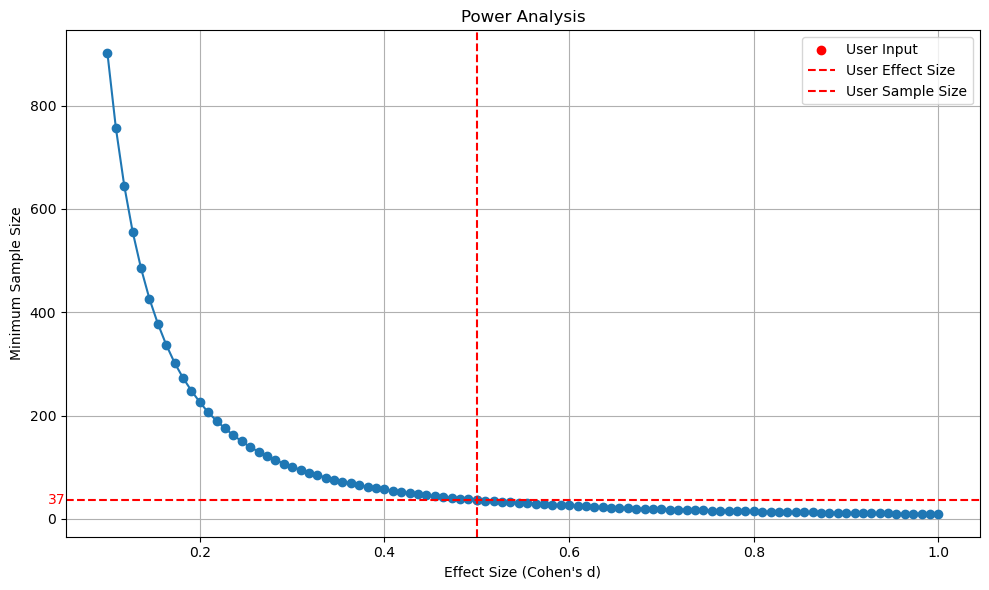

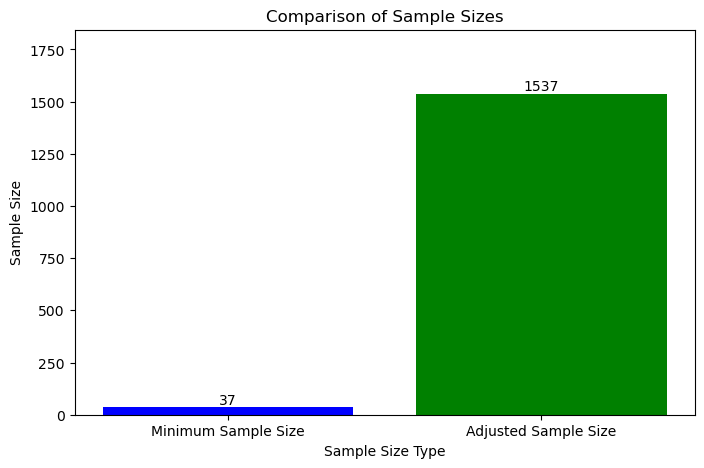

Sample Size Calculation Report

Confidence Level: 95%
Margin of Error: 0.05
Data Type: Discrete
Expected Proportion: 0.95
Test Type: One-sided
Effect Size (Cohen's d): 0.5
Sample Size Needed: 52
Adjusted Sample Size: 52
Minimum Sample Size Needed (Statistical Power 0.8): 37

Method Description:
Sample size calculation for One-sided Discrete data using normal approximation to binomial distribution and known proportion.

For discrete data, the sample size is calculated using the formula:
Sample Size = (z^2 * p * (1 - p)) / E^2
where:
- z is the z-score corresponding to the desired confidence level.
- p is the expected proportion of successes in the population.
- E is the margin of error.

This calculation assumes a normal approximation to the binomial distribution.



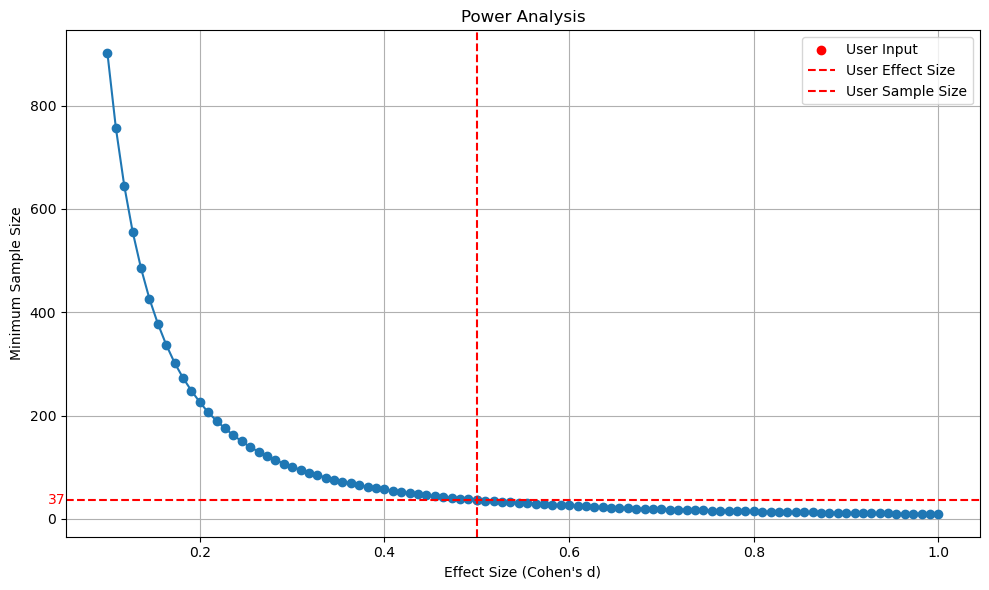

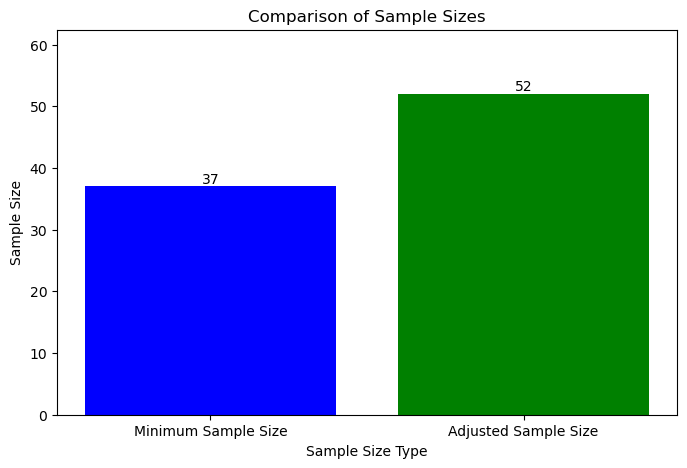

Sample Size Calculation Report

Confidence Level: 95%
Margin of Error: 0.05
Data Type: Discrete
Expected Proportion: 0.95
Test Type: One-sided
Effect Size (Cohen's d): 1.0
Sample Size Needed: 52
Adjusted Sample Size: 51
Minimum Sample Size Needed (Statistical Power 0.8): 10

Method Description:
Sample size calculation for One-sided Discrete data using normal approximation to binomial distribution and known proportion.

For discrete data, the sample size is calculated using the formula:
Sample Size = (z^2 * p * (1 - p)) / E^2
where:
- z is the z-score corresponding to the desired confidence level.
- p is the expected proportion of successes in the population.
- E is the margin of error.

This calculation assumes a normal approximation to the binomial distribution.



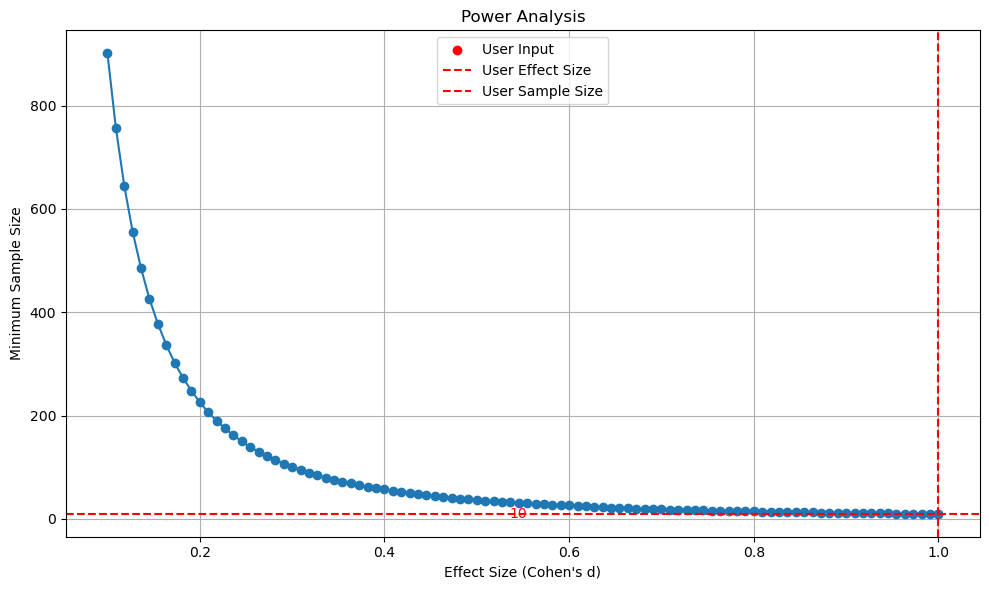

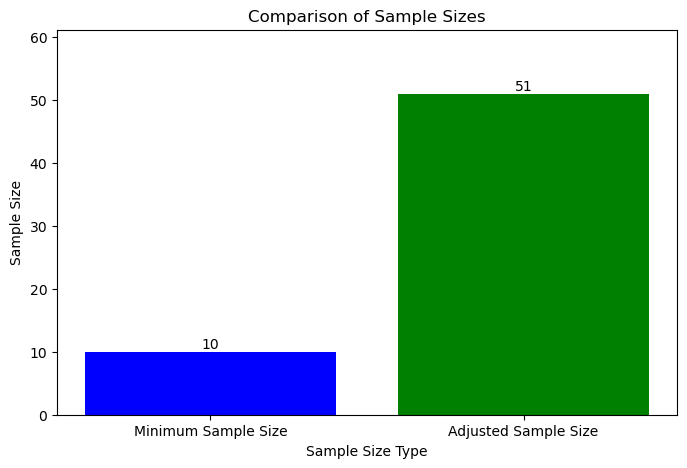

Sample Size Calculation Report

Confidence Level: 95%
Margin of Error: 0.05
Data Type: Discrete
Expected Proportion: 0.95
Test Type: One-sided
Effect Size (Cohen's d): 1.0
Sample Size Needed: 52
Adjusted Sample Size: 51
Minimum Sample Size Needed (Statistical Power 0.9): 18

Method Description:
Sample size calculation for One-sided Discrete data using normal approximation to binomial distribution and known proportion.

For discrete data, the sample size is calculated using the formula:
Sample Size = (z^2 * p * (1 - p)) / E^2
where:
- z is the z-score corresponding to the desired confidence level.
- p is the expected proportion of successes in the population.
- E is the margin of error.

This calculation assumes a normal approximation to the binomial distribution.



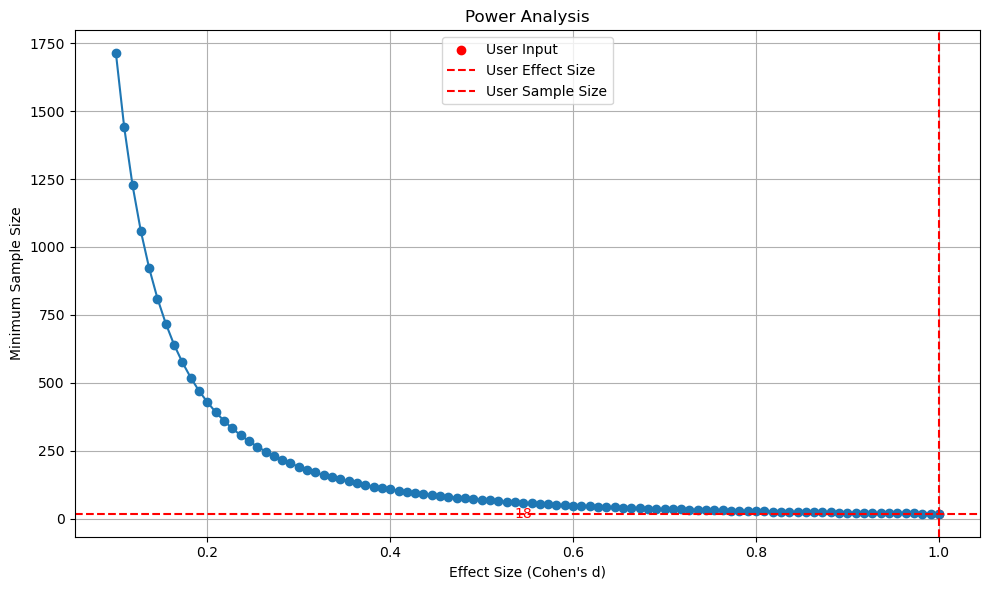

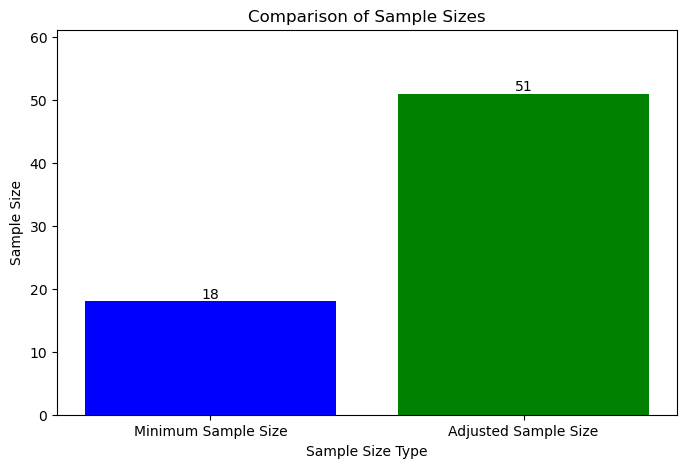

Sample Size Calculation Report

Confidence Level: 95%
Margin of Error: 0.05
Data Type: Discrete
Expected Proportion: 0.95
Test Type: One-sided
Effect Size (Cohen's d): 0.2
Sample Size Needed: 52
Adjusted Sample Size: 52
Minimum Sample Size Needed (Statistical Power 0.9): 429

Method Description:
Sample size calculation for One-sided Discrete data using normal approximation to binomial distribution and known proportion.

For discrete data, the sample size is calculated using the formula:
Sample Size = (z^2 * p * (1 - p)) / E^2
where:
- z is the z-score corresponding to the desired confidence level.
- p is the expected proportion of successes in the population.
- E is the margin of error.

This calculation assumes a normal approximation to the binomial distribution.



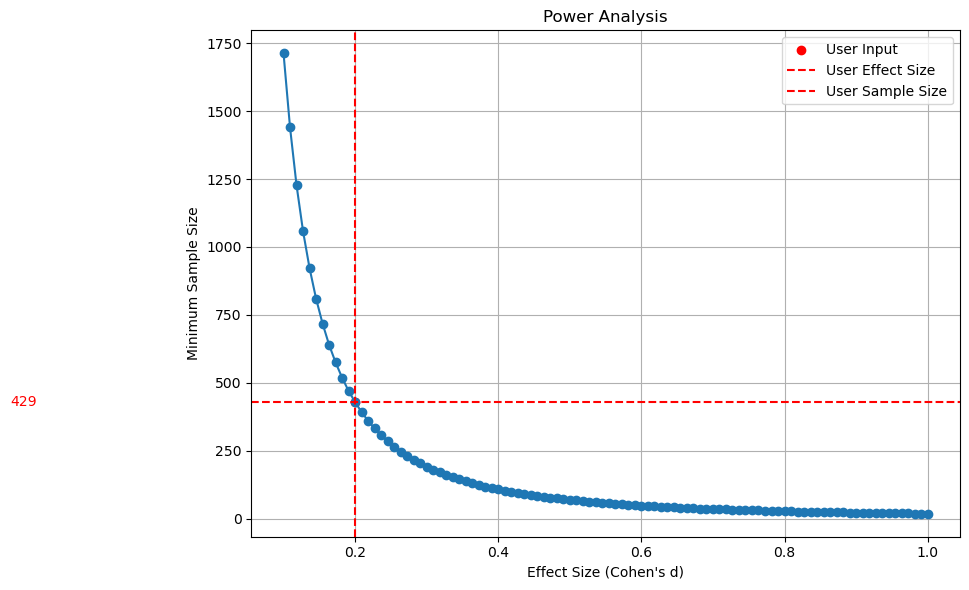

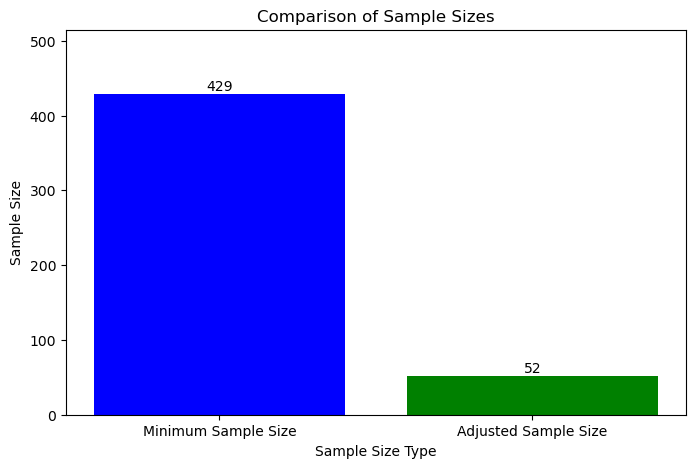

In [1]:
import tkinter as tk
from tkinter import ttk
import math
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import numpy as np  # Import NumPy for array manipulation
import scipy.stats as stats

def calculate_sample_size(confidence_level, margin_of_error, data_type, value, test_type, effect_size, power):
    z_score = {
        "80%": 1.2816,
        "85%": 1.4408,
        "90%": 1.6449,
        "95%": 1.9600,
        "98%": 2.3263,
        "99%": 2.5758
    }

    z = z_score[confidence_level]

    if data_type == 'Continuous':
        # Calculate sample size for continuous data
        sample_size = ((z * value) / margin_of_error) ** 2
        method_description = "Sample size calculation for Continuous data using normal distribution and known standard deviation."

        # Calculate minimum sample size for desired statistical power using statsmodels
        min_sample_size = smp.NormalIndPower().solve_power(
            effect_size=effect_size, nobs1=None, alpha=1 - power, power=power
    )

    elif data_type == 'Discrete':
        if test_type == 'One-sided':
            # Adjust z-score for one-sided test
            if confidence_level == "80%":
                z = 0.8416  # One-sided Z-score for 80% confidence
            elif confidence_level == "85%":
                z = 1.0364  # One-sided Z-score for 85% confidence
            elif confidence_level == "90%":
                z = 1.2816  # One-sided Z-score for 90% confidence
            elif confidence_level == "95%":
                z = 1.6449  # One-sided Z-score for 95% confidence
            elif confidence_level == "98%":
                z = 2.0537  # One-sided Z-score for 98% confidence
            elif confidence_level == "99%":
                z = 2.3263  # One-sided Z-score for 99% confidence
            else:
                print(f"Confidence level '{confidence_level}' not supported for a one-sided test.")
                return None, None, None
        elif test_type == 'Two-sided':
            z = z_score[confidence_level]  # Reset z-score for two-sided test
            z = abs(z)  # Absolute value for two-sided test
        else:
            print("Invalid test type. Supported values are 'One-sided' and 'Two-sided'.")
            return None, None, None
        
        # Calculate sample size for proportion estimation (discrete data)
        sample_size = (z**2 * value * (1 - value)) / (margin_of_error**2)
        method_description = f"Sample size calculation for {'One-sided' if test_type == 'One-sided' else 'Two-sided'} Discrete data using normal approximation to binomial distribution and known proportion."
        
        # Calculate minimum sample size for desired statistical power using statsmodels
        min_sample_size = smp.NormalIndPower().solve_power(effect_size=effect_size, nobs1=None, alpha=1 - power, power=power)
    else:
        print("Invalid data type. Supported values are 'Continuous' and 'Discrete'.")
        return None, None, None

    # Adjust sample size for effect size (statistical power)
    adjusted_sample_size = sample_size / (1 + ((effect_size ** 2) / sample_size))
    
    return math.ceil(sample_size), math.ceil(adjusted_sample_size), method_description, math.ceil(min_sample_size)



def generate_report(confidence_level, margin_error, data_type, value, test_type, effect_size, sample_size, adjusted_sample_size, min_sample_size, power):
    if sample_size is None or adjusted_sample_size is None:
        print("Error occurred during sample size calculation.")
        return

    method_description = ""  # Define your method description
    
    # Method description for continuous data
    if data_type == 'Continuous':
        method_description = "Sample size calculation for Continuous data using normal distribution and known standard deviation.\n\n" \
                             "For continuous data, the sample size is calculated using the formula:\n" \
                             "Sample Size = ((z * σ) / E) ^ 2\n" \
                             "where:\n" \
                             "- z is the z-score corresponding to the desired confidence level.\n" \
                             "- σ is the population standard deviation.\n" \
                             "- E is the margin of error.\n\n" \
                             "This calculation assumes a normal distribution of the data."

    # Method description for discrete data
    elif data_type == 'Discrete':
        method_description = f"Sample size calculation for {'One-sided' if test_type == 'One-sided' else 'Two-sided'} Discrete data using normal approximation to binomial distribution and known proportion.\n\n" \
                             "For discrete data, the sample size is calculated using the formula:\n" \
                             "Sample Size = (z^2 * p * (1 - p)) / E^2\n" \
                             "where:\n" \
                             "- z is the z-score corresponding to the desired confidence level.\n" \
                             "- p is the expected proportion of successes in the population.\n" \
                             "- E is the margin of error.\n\n" \
                             "This calculation assumes a normal approximation to the binomial distribution."

    report = f"Sample Size Calculation Report\n\n"
    report += f"Confidence Level: {confidence_level}\n"
    report += f"Margin of Error: {margin_error}\n"
    report += f"Data Type: {data_type}\n"
    if data_type == 'Continuous':
        report += f"Population Standard Deviation: {value}\n"
    elif data_type == 'Discrete':
        report += f"Expected Proportion: {value}\n"
    report += f"Test Type: {test_type}\n"
    report += f"Effect Size (Cohen's d): {effect_size}\n"
    report += f"Sample Size Needed: {sample_size}\n"
    report += f"Adjusted Sample Size: {adjusted_sample_size}\n"
    report += f"Minimum Sample Size Needed (Statistical Power {power}): {min_sample_size}\n\n"
    report += f"Method Description:\n{method_description}\n"

    print(report)  # Print the report in the terminal


def update_fields_state(event=None):  # Added event=None to handle combobox event
    data_type = data_combobox.get()
    if data_type == 'Continuous':
        std_dev_entry.config(state='normal')
        proportion_entry.config(state='disabled')
    elif data_type == 'Discrete':
        std_dev_entry.config(state='disabled')
        proportion_entry.config(state='normal')
    else:
        std_dev_entry.config(state='disabled')
        proportion_entry.config(state='disabled')

def calculate_button_clicked():
    try:
        conf_level = confidence_combobox.get()
        margin_err = float(margin_entry.get())
        data_type = data_combobox.get()
        if data_type == 'Continuous':
            value = float(std_dev_entry.get())
        elif data_type == 'Discrete':
            value = float(proportion_entry.get())
        else:
            raise ValueError("Invalid data type. Supported values are 'Continuous' and 'Discrete'.")

        test_type = test_combobox.get()
        effect_size = float(effect_size_entry.get())  # Get effect size (Cohen's d) value
        power = float(power_entry.get())  # Get desired statistical power value
                # Calculate sample size and other parameters
                # Calculate sample size and other parameters
        sample_size, adjusted_sample_size, _, min_sample_size = calculate_sample_size(conf_level, margin_err, data_type, value, test_type, effect_size, power)

        # Generate the report
        generate_report(conf_level, margin_err, data_type, value, test_type, effect_size, sample_size, adjusted_sample_size, min_sample_size, power)

        # Plot power analysis with more points
        effect_sizes = np.linspace(0.1, 1, 100)  # More points for smoother plot
        sample_sizes = []  # Corresponding sample sizes
        for es in effect_sizes:
            _, _, _, min_ss = calculate_sample_size(conf_level, margin_err, data_type, value, test_type, es, power)
            sample_sizes.append(min_ss)
        
        plt.figure(figsize=(10, 6))
        plt.plot(effect_sizes, sample_sizes, marker='o')
        plt.title('Power Analysis')
        plt.xlabel("Effect Size (Cohen's d)")
        plt.ylabel('Minimum Sample Size')
        plt.grid(True)

        
        
        # Get user-input effect size and corresponding sample size
        user_effect_size = float(effect_size_entry.get())
        user_sample_size = sample_sizes[np.where(effect_sizes == user_effect_size)[0][0]]

        # Plot user input point and lines
        plt.scatter(user_effect_size, user_sample_size, color='red', label='User Input')
        plt.axvline(x=user_effect_size, color='red', linestyle='--', label='User Effect Size')
        plt.axhline(y=user_sample_size, color='red', linestyle='--', label='User Sample Size')
        
        # Add data label for user sample size
        plt.text(user_effect_size - .445, user_sample_size, f'{user_sample_size}', va='center', ha='right', color='red')

        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot bar chart for sample sizes
        labels = ['Minimum Sample Size', 'Adjusted Sample Size']
        values = [min_sample_size, adjusted_sample_size]

        plt.figure(figsize=(8, 5))
        bars = plt.bar(labels, values, color=['blue', 'green'])
        plt.xlabel('Sample Size Type')
        plt.ylabel('Sample Size')
        plt.title('Comparison of Sample Sizes')
        plt.ylim(0, max(values) * 1.2)  # Set y-axis limit slightly above the maximum value for better visualization

        # Add data labels on top of bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

        plt.show()

        result_label.config(text="Report printed in terminal!")
    except ValueError as e:
        result_label.config(text=f"Error: {e}")

# Create main window
root = tk.Tk()
root.title("Sample Size Calculator")

# Create and place GUI components
ttk.Label(root, text="Confidence Level:").pack()
confidence_combobox = ttk.Combobox(root, values=["80%", "85%", "90%", "95%", "98%", "99%"])
confidence_combobox.pack()
confidence_combobox.set("95%")  # Default value

ttk.Label(root, text="Margin of Error:").pack()
margin_entry = ttk.Entry(root)
margin_entry.pack()
margin_entry.insert(0, "0.05")  # Default value

ttk.Label(root, text="Data Type:").pack()
data_combobox = ttk.Combobox(root, values=["", "Continuous", "Discrete"])
data_combobox.pack()
data_combobox.set("")  # Default value
data_combobox.bind("<<ComboboxSelected>>", update_fields_state)  # Bind event to update field state

ttk.Label(root, text="Population Standard Deviation (for Continuous):").pack()
std_dev_entry = ttk.Entry(root, state='disabled')
std_dev_entry.pack()

ttk.Label(root, text="Expected Proportion (for Discrete):").pack()
proportion_entry = ttk.Entry(root, state='disabled')
proportion_entry.pack()

ttk.Label(root, text="Test Type:").pack()
test_combobox = ttk.Combobox(root, values=["One-sided", "Two-sided"])
test_combobox.pack()
test_combobox.set("One-sided")  # Default value

ttk.Label(root, text="Effect Size (Cohen's d):").pack()
effect_size_entry = ttk.Entry(root)
effect_size_entry.pack()
effect_size_entry.insert(0, "0.5")  # Default value

ttk.Label(root, text="Desired Statistical Power:").pack()
power_entry = ttk.Entry(root)
power_entry.pack()
power_entry.insert(0, "0.8")  # Default value

calculate_button = ttk.Button(root, text="Calculate Sample Size", command=calculate_button_clicked)
calculate_button.pack()

result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()
